# CHN Hackathon Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [12]:
# We will need the RBCPath type from the rbclib package to load data from the RBC. It will work like a cloudpath object.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [13]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

In [14]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [87]:
#data['subject_id'] = data['subject_id'].str.replace('sub-', '')
data['subject_id'] = data['subject_id'].astype(int)

data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [90]:
data.isnull().sum()

participant_id        0
session_id        13740
atlas                 0
hemisphere            0
StructName            0
NumVert               0
SurfArea              0
GrayVol               0
ThickAvg              0
ThickStd              0
MeanCurv              0
GausCurv              0
FoldInd               0
CurvInd               0
Index                 0
SegId                 0
Mean_wgpct            0
StdDev_wgpct          0
Min_wgpct             0
Max_wgpct             0
Range_wgpct           0
SNR_wgpct             0
Mean_piallgi          0
StdDev_piallgi        0
Min_piallgi           0
Max_piallgi           0
Range_piallgi         0
dtype: int64

### Getting the Participant Lists and Metadata

We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [15]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN


In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, 0 to 533
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_id         1601 non-null   int64  
 1   study                  1601 non-null   object 
 2   study_site             1601 non-null   object 
 3   session_id             1601 non-null   object 
 4   wave                   1601 non-null   int64  
 5   age                    1601 non-null   float64
 6   sex                    1601 non-null   object 
 7   race                   1601 non-null   object 
 8   ethnicity              1601 non-null   object 
 9   bmi                    1112 non-null   float64
 10  handedness             1601 non-null   object 
 11  participant_education  1601 non-null   object 
 12  parent_1_education     1578 non-null   object 
 13  parent_2_education     1457 non-null   object 
 14  p_factor               1067 non-null   float64
dtypes: float64

In [92]:
all_data.isnull().sum()

participant_id             0
study                      0
study_site                 0
session_id                 0
wave                       0
age                        0
sex                        0
race                       0
ethnicity                  0
bmi                      489
handedness                 0
participant_education      0
parent_1_education        23
parent_2_education       144
p_factor                 534
expected_age               0
age_diff                   0
status                     0
dtype: int64

In [53]:
all_data['participant_id'].nunique()

1601

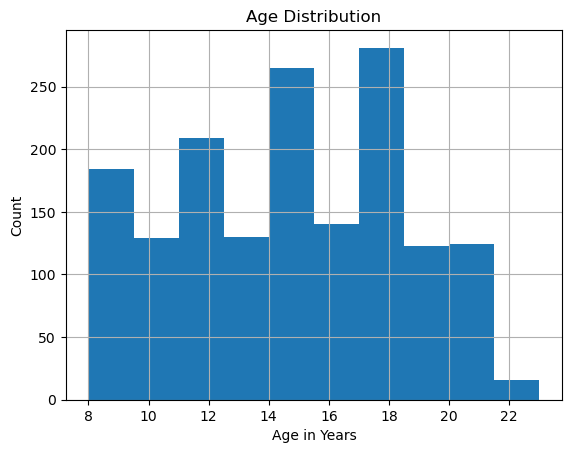

age
8      77
9     107
10    129
11    101
12    108
13    130
14    129
15    136
16    140
17    138
18    143
19    123
20     82
21     42
22     13
23      3
dtype: int64


In [29]:
import matplotlib.pyplot as plt

all_data['age'] = all_data['age'].astype(int)

all_data.hist(column='age')
plt.title("Age Distribution") # Optional: Add a title
plt.xlabel("Age in Years") # Optional: Add an x-axis label
plt.ylabel("Count") # Optional: Add a y-axis label
plt.show()

age_counts = all_data.groupby('participant_education').size()
print(age_counts)

In [81]:
# all_data['participant_education'] = all_data['participant_education'].str.replace('th Grade', '')
# all_data['participant_education'] = all_data['participant_education'].str.replace('rd Grade', '')
# all_data['participant_education'] = all_data['participant_education'].str.replace('nd Grade', '')
# all_data['participant_education'] = all_data['participant_education'].str.replace('st Grade', '')
# all_data['participant_education'] = all_data['participant_education'].str.replace('Some College', '13')
# all_data['participant_education'] = all_data['participant_education'].str.replace("Bachelor's Degree", '16')
# all_data['participant_education'] = all_data['participant_education'].astype(int)

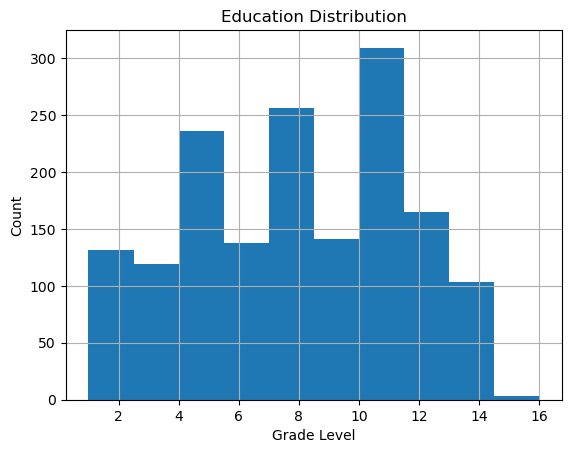

participant_education
1      18
2     113
3     119
4     101
5     135
6     138
7     126
8     130
9     141
10    145
11    164
12    165
13    103
16      3
dtype: int64


In [69]:
all_data.hist(column='participant_education')
plt.title("Education Distribution") # Optional: Add a title
plt.xlabel("Grade Level") # Optional: Add an x-axis label
plt.ylabel("Count") # Optional: Add a y-axis label
plt.show()

education_counts = all_data.groupby('participant_education').size()
print(education_counts)

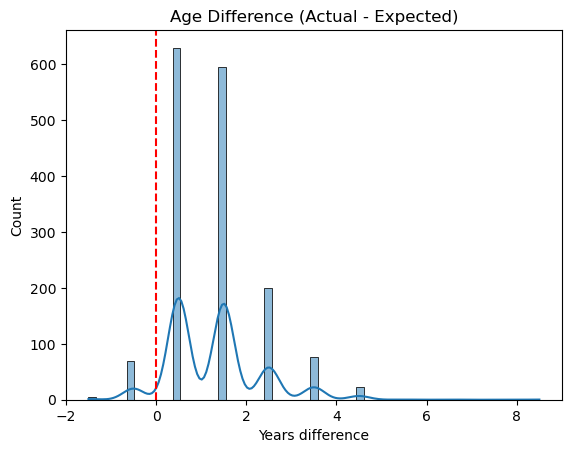

In [72]:
# Define expected age for each grade
expected_age = {
    1: 6.5, 2: 7.5, 3: 8.5, 4: 9.5, 5: 10.5, 6: 11.5,
    7: 12.5, 8: 13.5, 9: 14.5, 10: 15.5, 11: 16.5, 12: 17.5,
    13: 18.5, 14: 19.5, 15: 20.5, 16: 21.5, 17: 22.5, 18: 23.5,
    19: 24.5, 20: 25.5, 21: 26.5, 22: 27.5, 23: 28.5, 24: 29.5,
    25: 30.5, 26: 31.5
}

all_data['expected_age'] = all_data['participant_education'].map(expected_age)
all_data['age_diff'] = all_data['age'] - all_data['expected_age']

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(all_data['age_diff'], kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Age Difference (Actual - Expected)')
plt.xlabel('Years difference')
plt.show()


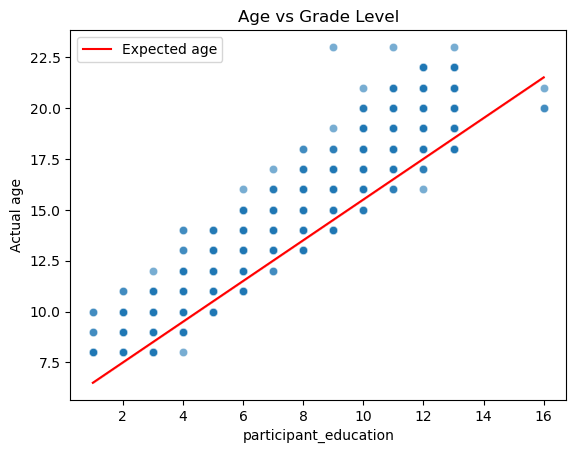

In [74]:
sns.scatterplot(data=all_data, x='participant_education', y='age', alpha=0.6)
sns.lineplot(x=all_data['participant_education'], y=all_data['expected_age'], color='red', label='Expected age')
plt.ylabel('Actual age')
plt.title('Age vs Grade Level')
plt.show()

In [75]:
all_data['status'] = 'on_track'
all_data.loc[all_data['age_diff'] > 1, 'status'] = 'held_back'
all_data.loc[all_data['age_diff'] < -1, 'status'] = 'advanced'

all_data['status'].value_counts()

status
held_back    898
on_track     699
advanced       4
Name: count, dtype: int64

In [76]:
all_data[all_data['status'] != 'on_track'][['participant_id', 'participant_education', 'age', 'age_diff', 'status']]


,participant_id,participant_education,age,age_diff,status
2,1007995238,6,13,1.5,held_back
3,1011497669,9,16,1.5,held_back
4,1017092387,11,18,1.5,held_back
10,1039936647,10,17,1.5,held_back
14,1046399178,13,21,2.5,held_back
...,...,...,...,...,...
529,969649154,5,12,1.5,held_back
530,970890500,11,18,1.5,held_back
531,975856179,4,11,1.5,held_back
532,984757368,5,13,2.5,held_back


sex
Female    837
Male      764
dtype: int64


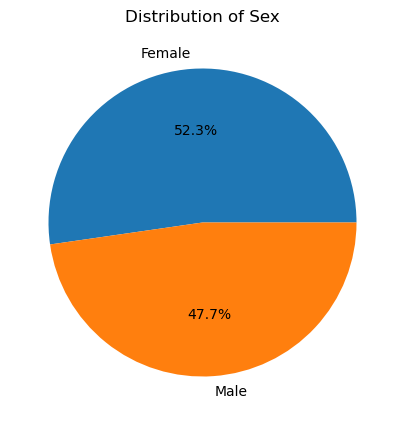

In [32]:
sex_counts = all_data.groupby('sex').size()
print(sex_counts)

# Plot the pie chart
sex_counts.plot.pie(
    autopct='%1.1f%%', # Display percentages on slices
    figsize=(5, 5)    # Set figure size
)

plt.title('Distribution of Sex') # Add a title
plt.ylabel('') # Remove the default 'Category' y-axis label
plt.show()

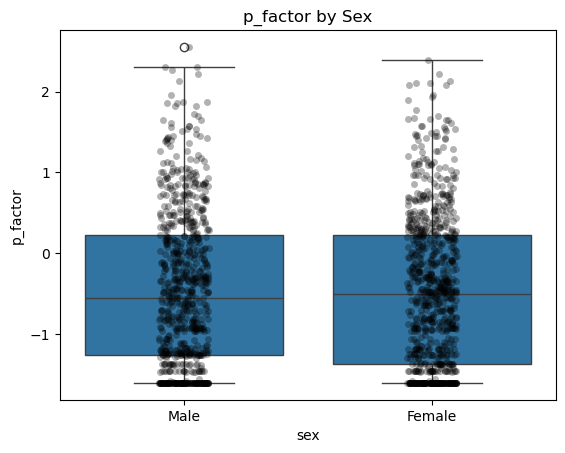

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=all_data, x='sex', y='p_factor')
sns.stripplot(data=all_data, x='sex', y='p_factor', color='black', alpha=0.3)
plt.title('p_factor by Sex')
plt.show()

In [79]:
all_data.groupby('status')['p_factor'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
advanced,2.0,0.352885,0.686029,-0.132210,0.110338,0.352885,0.595433,0.837981
held_back,596.0,-0.370979,0.946293,-1.608375,-1.233807,-0.463180,0.319113,2.390287
on_track,469.0,-0.572799,0.902554,-1.608375,-1.370125,-0.706956,0.034810,2.556079


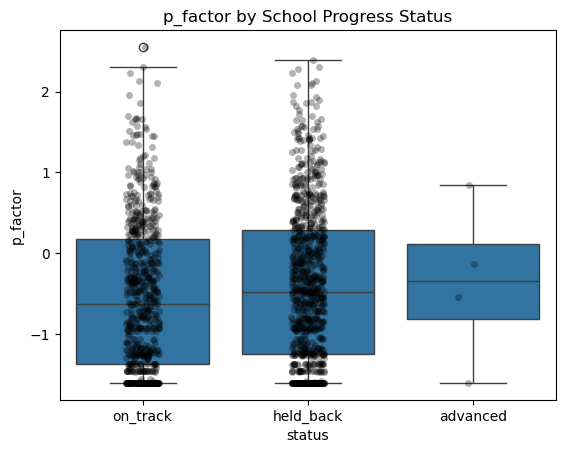

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=all_data, x='status', y='p_factor')
sns.stripplot(data=all_data, x='status', y='p_factor', color='black', alpha=0.3)
plt.title('p_factor by School Progress Status')
plt.show()

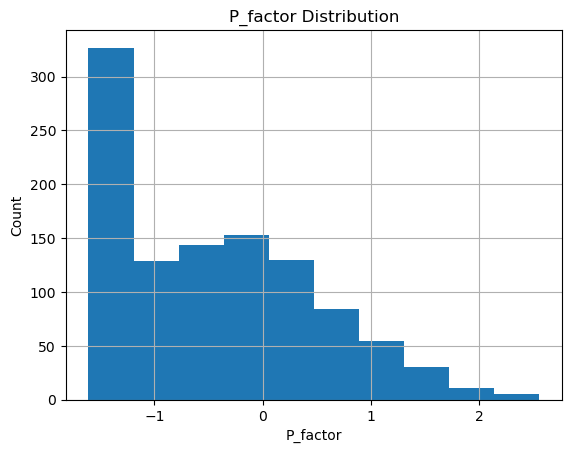

In [34]:
import matplotlib.pyplot as plt

all_data.hist(column='p_factor')
plt.title("P_factor Distribution") # Optional: Add a title
plt.xlabel("P_factor") # Optional: Add an x-axis label
plt.ylabel("Count") # Optional: Add a y-axis label
plt.show()

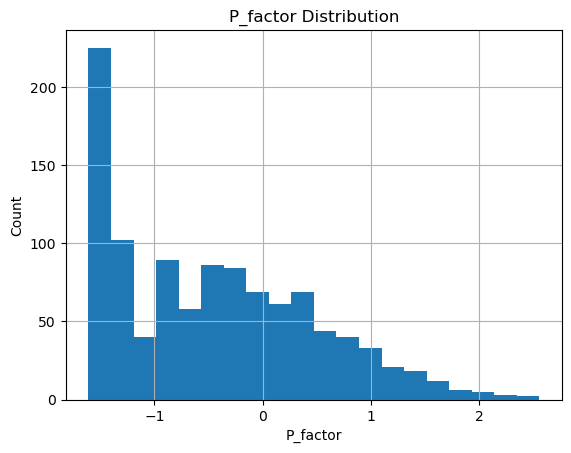

In [83]:
import matplotlib.pyplot as plt

all_data.hist(column='p_factor', bins=20)
plt.title("P_factor Distribution") # Optional: Add a title
plt.xlabel("P_factor") # Optional: Add an x-axis label
plt.ylabel("Count") # Optional: Add a y-axis label
plt.show()

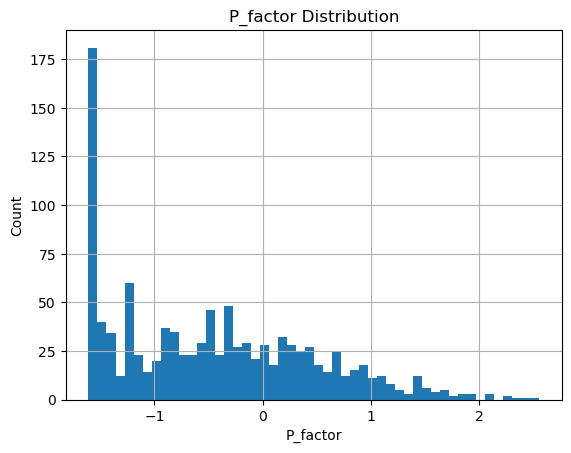

In [84]:
import matplotlib.pyplot as plt

all_data.hist(column='p_factor', bins=50)
plt.title("P_factor Distribution") # Optional: Add a title
plt.xlabel("P_factor") # Optional: Add an x-axis label
plt.ylabel("Count") # Optional: Add a y-axis label
plt.show()

Pearson correlation: 0.15673717391621075
Spearman correlation: 0.1566659852075557
Pearson r=0.157, p=2.3e-05
Spearman r=0.157, p=2.32e-05


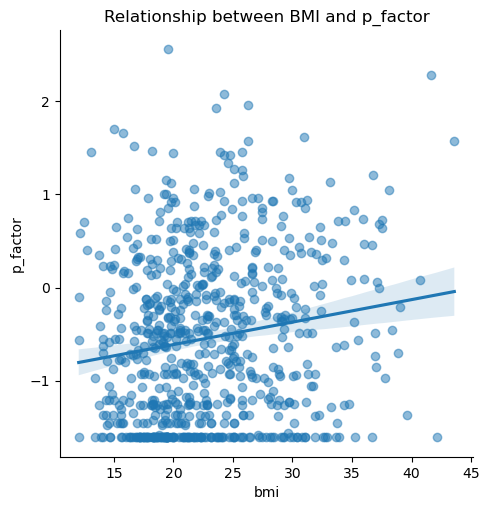

In [38]:
import pandas as pd

# Keep only rows with both values present
subset = all_data[['bmi', 'p_factor']].dropna()

pearson_corr = subset['bmi'].corr(subset['p_factor'], method='pearson')
spearman_corr = subset['bmi'].corr(subset['p_factor'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

from scipy.stats import pearsonr, spearmanr

pearson_r, pearson_p = pearsonr(subset['bmi'], subset['p_factor'])
spearman_r, spearman_p = spearmanr(subset['bmi'], subset['p_factor'])

print(f"Pearson r={pearson_r:.3f}, p={pearson_p:.3g}")
print(f"Spearman r={spearman_r:.3f}, p={spearman_p:.3g}")

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='bmi', y='p_factor', data=subset, scatter_kws={'alpha':0.5})
plt.title('Relationship between BMI and p_factor')
plt.show()


In [41]:
categorical_cols = ['sex', 'race', 'ethnicity', 'handedness', 'study_site']
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(all_data[col].value_counts(dropna=False, normalize=True) * 100)


sex distribution:
sex
Female    52.279825
Male      47.720175
Name: proportion, dtype: float64

race distribution:
race
Black    44.284822
White    43.972517
Other    10.868207
Asian     0.874453
Name: proportion, dtype: float64

ethnicity distribution:
ethnicity
not Hispanic or Latino    93.441599
Hispanic or Latino         6.558401
Name: proportion, dtype: float64

handedness distribution:
handedness
Right           83.947533
Left            13.741412
Ambidextrous     2.311056
Name: proportion, dtype: float64

study_site distribution:
study_site
PNC1    100.0
Name: proportion, dtype: float64


In [43]:
all_data[['bmi', 'p_factor', 'age']].describe()

,bmi,p_factor,age
count,1112.000000,1067.000000,1601.000000
mean,22.746421,-0.458332,14.482199
std,5.539870,0.932285,3.707740
min,12.050000,-1.608375,8.000000
25%,18.800000,-1.270036,11.000000
50%,21.720000,-0.517830,15.000000
75%,25.805000,0.216567,18.000000
max,43.590000,2.556079,23.000000


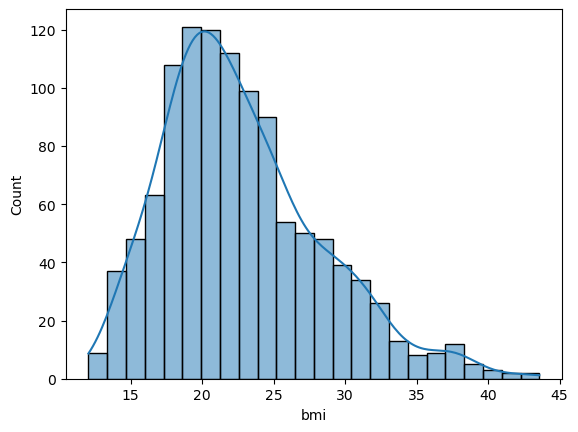

In [47]:
sns.histplot(all_data['bmi'], kde=True)
plt.show()

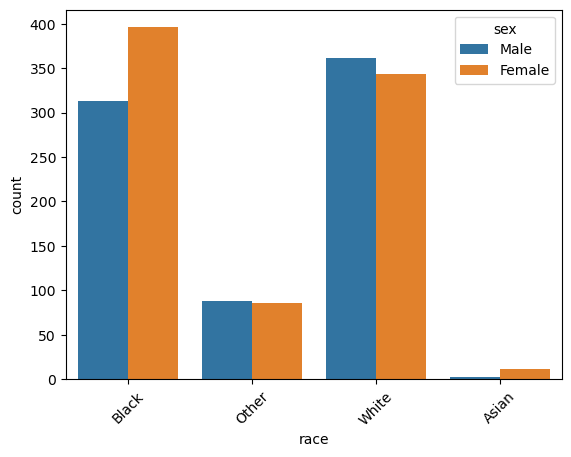

In [50]:
sns.countplot(data=all_data, x='race', hue='sex')
plt.xticks(rotation=45)
plt.show()

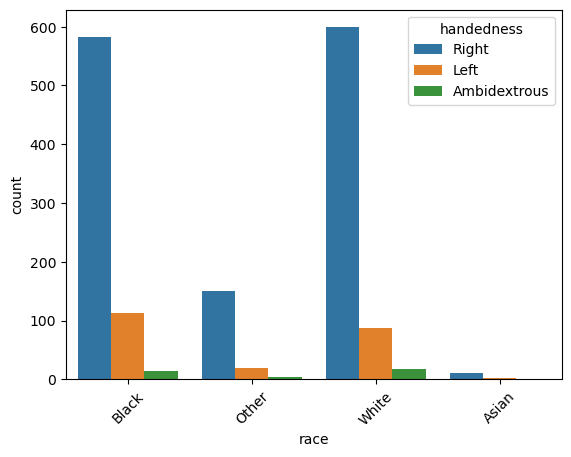

In [51]:
sns.countplot(data=all_data, x='race', hue='handedness')
plt.xticks(rotation=45)
plt.show()

In [98]:
# Assuming the second dataset is loaded into a DataFrame called 'metadata_df'

# 1. Check for missing values in parent_1_education OR parent_2_education
is_p1_missing = all_data['parent_1_education'].isnull()
is_p2_missing = all_data['parent_2_education'].isnull()

# 2. Combine the checks using the OR operator (|) and assign to the new column
all_data['parent_education_missing'] = is_p1_missing | is_p2_missing

# 3. (Optional) Check the results
print(f"Total rows: {len(all_data)}")

# Count of True/False flags for missing education
missing_count = all_data['parent_education_missing'].sum()
print(f"Number of participants with missing parent education data: {missing_count}")

# Verification: The missing count should be the number of rows where
# P1 is NaN (23) PLUS the number of rows where P2 is NaN AND P1 is NOT NaN.
# Since the max number of NaNs is 144 (P2), the total number of unique participants
# missing AT LEAST one parent education record is between 144 and (144 + 23).

Total rows: 1601
Number of participants with missing parent education data: 154


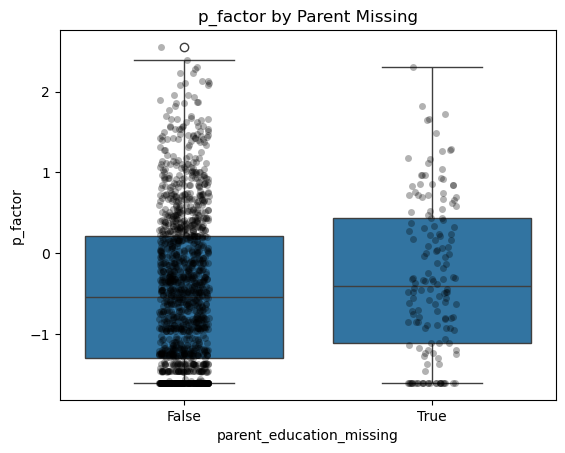

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=all_data, x='parent_education_missing', y='p_factor')
sns.stripplot(data=all_data, x='parent_education_missing', y='p_factor', color='black', alpha=0.3)
plt.title('p_factor by Parent Missing')
plt.show()

In [94]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold

data.rename(columns={'subject_id': 'participant_id'}, inplace=True)

merged_df = pd.merge(data, all_data, on='participant_id')
merged_df_clean = merged_df.dropna(subset=['p_factor'])
unique_participants_df = merged_df_clean.drop_duplicates(subset=['participant_id'])

# Bin the Target Variable (p_factor)
# Create 20 bins based on quantiles (equal number of participants per bin)
N_BINS = 20
unique_participants_df['p_factor_binned'] = pd.qcut(
    unique_participants_df['p_factor'],
    q=N_BINS,
    labels=False,
    # 'drop' handles cases where certain values are repeated, resulting in fewer than N_BINS
    duplicates='drop'
)

# Merge the binned label back into the full dataset
merged_df_clean = pd.merge(
    merged_df_clean,
    unique_participants_df[['participant_id', 'p_factor_binned']],
    on='participant_id',
    how='left'
)

/tmp/ipykernel_176/3514711634.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_participants_df['p_factor_binned'] = pd.qcut(


In [ ]:
# --- 3. Step: Perform the Stratified Group Split ---

# Define the inputs for the split
# X and y are technically placeholders, the split operates on indices
X = merged_df_clean.drop(columns=['p_factor']) # Features
y_stratify = merged_df_clean['p_factor_binned'] # Binned target for stratification
groups = merged_df_clean['participant_id'] # Participant IDs for grouping

# Initialize StratifiedGroupKFold (n_splits=5 gives 80/20 split)
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Get the indices for the single train/test split
# We iterate once to get the first fold (the single split)
for train_index, test_index in sgkf.split(X, y_stratify, groups):
    # Use the indices to slice the cleaned DataFrame
    train_df = merged_df_clean.iloc[train_index]
    test_df = merged_df_clean.iloc[test_index]
    break

print(f"Total rows after dropping nulls: {len(merged_df_clean)}")
print(f"Train Set Size (approx. 80%): {len(train_df)} rows")
print(f"Test Set Size (approx. 20%): {len(test_df)} rows")
print(f"Number of Unique Participants in Train Set: {train_df['participant_id'].nunique()}")
print(f"Number of Unique Participants in Test Set: {test_df['participant_id'].nunique()}")

# --- Verification of Stratification (Crucial) ---
print("\n--- Target Distribution Check (should be similar) ---")
print("Train Set Binned Target Distribution:")
print(train_df['p_factor_binned'].value_counts(normalize=True).sort_index().round(4))
print("\nTest Set Binned Target Distribution:")
print(test_df['p_factor_binned'].value_counts(normalize=True).sort_index().round(4))

## Project Goal: Predict the `p_factor`

The RBC datasets include a variable for each subject called the `p_factor`.
This factor is intended to capture overall psychopathology and is discussed at
length in RBC publications. The goal for this project is to train a
machine-learning tool to predict the `p_factor` of each participant in the
test dataset by using data from the participants in the training dataset.
Note that the `p_factor` column in the training dataset is provided, but the
`p_factor` column in the test dataset has been set to `NaN`.

Your specific task is to calculate predicted `p_factor` values, to insert
these values into the `'p_factor'` column of the provided `test_data`
dataframe, to save `test_data` to disk using the `test_data.to_csv` method
(example below), then finally to commit and push the file to your group's
GitHub repository.

We will look over the results of the group mini-projects together once
everyone has submitted their predictions.

**In this section, we demonstrate an example approach to predicting the
`p_factor` using one of the most straightforward supervised techniques in
machine learning: linear regression.** Suppose we suspected that the size of
Brodmann Area 1 was predictive of the `p_factor` in individual participants
and thus wanted to run a linear regression analysis to predict `p_factor` in
the test participants based on the relationship in the training participants.
Performing linear regression will require a few steps, which are likely to be
similar in your projects:

1. Collect the relevant data (the surface areas of BA1) into a dataframe.
2. Train the linear regression model using the training participants.
3. Use the trained model to predict the `p_factor` of the test subjects.
4. Export and commit our predictions.

### Step 1. Collect Data

The data we need to make the predictions are, for each participant, (1) the
surface area of BA1, and (2) the `p_factor`. We can collect these into a
dataframe using `pandas` and the `RBCPath` type (to load the data).

The surface area of BA1 can be found in the FreeSurfer TSV files examined
earlier in this notebook. We'll start by writing a function that loads the
appropriate TSV for for a given participant.

In order to speed up the loading of data during the project, we can specify
a `local_cache_dir` where any data downloaded using the function will be
automatically saved; the next time you load the same data, it will be loaded
from local storage instead of from S3 (local storage is much faster). The
function here uses the directory `cache` in your home directory by default,
but you can change this if you prefer a different directory. The directory
will be automatically created for you if it does not exist.

In [16]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

We can run this function to obtain a subject's FreeSurfer dataframe. This
dataframe contains information about various anatomical atlases that segment
the cortical surface into distinct regions. Notice that the `atlas` column of
the dataframe contains the name of distinct atlases while the `StructName`
column contains the name of the ROI described. The `SurfArea` column gives the
surface area of each ROI.

In [17]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13740 entries, 0 to 13739
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      13740 non-null  object 
 1   session_id      0 non-null      float64
 2   atlas           13740 non-null  object 
 3   hemisphere      13740 non-null  object 
 4   StructName      13740 non-null  object 
 5   NumVert         13740 non-null  int64  
 6   SurfArea        13740 non-null  int64  
 7   GrayVol         13740 non-null  int64  
 8   ThickAvg        13740 non-null  float64
 9   ThickStd        13740 non-null  float64
 10  MeanCurv        13740 non-null  float64
 11  GausCurv        13740 non-null  float64
 12  FoldInd         13740 non-null  int64  
 13  CurvInd         13740 non-null  float64
 14  Index           13740 non-null  int64  
 15  SegId           13740 non-null  int64  
 16  Mean_wgpct      13740 non-null  float64
 17  StdDev_wgpct    13740 non-null 

To extract the surface area of BA1, we need to look for rows whose
`StructName` indicates that it represents BA1. In the RBC database, the name
`'Brodmann.1'` is used to represent Brodmann Area 1. We can select only the
rows of interest using this name.

In [7]:
row_mask = (data['StructName'] == 'Brodmann.1')
data[row_mask]

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
1876,sub-1000393599,NaN,PALS_B12_Brodmann,lh,Brodmann.1,2851,1753,4067,2.069,0.576,...,5.2783,-7.2181,32.3884,39.6064,3.0996,3.4915,0.6993,2.4164,5.3746,2.9581
1919,sub-1000393599,NaN,PALS_B12_Brodmann,rh,Brodmann.1,2379,1537,3766,2.008,0.586,...,4.8646,-6.7201,38.8376,45.5577,3.3062,3.2389,0.5011,2.4060,4.8009,2.3949


Given these rows, we can extract the BA1 surface areas and sum them (we will
perform the linear regression on the bilateral BA1 surface area by adding the
left and right hemisphere surface areas).

In [8]:
ba1_surfareas = data.loc[row_mask, 'SurfArea']
ba1_surfarea = sum(ba1_surfareas)

# Show the bilateral surface area for this participant (in square mm):
ba1_surfarea

3290

Based on the above workflow, we can now write a function that extracts the BA1
surface area for a participant.

In [9]:
def load_ba1_surfarea(participant_id):
    """Loads and returns the bilateral Brodmann Area 1 surface area for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    row_mask = (data['StructName'] == 'Brodmann.1')
    # Then extract and sum the surface areas:
    ba1_surfareas = data.loc[row_mask, 'SurfArea']
    ba1_surfarea = sum(ba1_surfareas)
    # And return this value:
    return ba1_surfarea

Let's test this function:

In [10]:
load_ba1_surfarea(example_participant_id)

3290

Now that we have code written to extract data from a single subject, we can
gather the BA1 data for our training and test subjects into a single
dataframe. Doing so will require downloading all of the TSV files for all of
the subjects in the training dataset. This will take some time, but probably
less than an hour.

In [11]:
# First load in surface area data for each participant:
print("Loading surface areas...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
all_vars = {
    'participant_id': [],
    'ba1_surface_area': [],
    'p_factor': []}

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    # Load the surface area for this participant:
    try:
        surf_area = load_ba1_surfarea(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN.
        surf_area = np.nan
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    all_vars['ba1_surface_area'].append(surf_area)
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars = all_vars[~np.isnan(all_vars['p_factor'])]
test_vars = all_vars[np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
all_vars

Loading surface areas...


IntProgress(value=0, max=1601)

KeyboardInterrupt: 

### Step 2. Train the Linear Regression

To train and perform the linear regression analysis, we will use the
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
type from scikit-learn.

In [ ]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_vars.loc[:, ['ba1_surface_area', 'p_factor']].values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :1], train_matrix[:, 1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

### Step 3. Predict the `p_factor` of the Test Data

In [ ]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test_matrix = test_vars.loc[:, ['ba1_surface_area']].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)

# Display the predictions:
p_factor_predictions

### Step 4. Save and Commit the Results

To save and commit the results, we first need to save the predicted `p_factor`
data into the test dataframe (where there are currently NaNs). In the cell
above, we calculated the variable `test_okrows` that indicates which rows
of the `test_vars`, `test_matrix`, and `test_data` objects were predicted
(those that weren't predicted were excluded due to missing surface area data
in our case).

We can use this to insert the predicted `p_factor` data into `test_data`.

In [ ]:
test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test_data

We now need to save the data to disk. We want to put this in the `results`
directory of the repository.

In [ ]:
# The sep='\t' option here is necessary for tab-separated-value (as opposed to
# comma-separated-value) files. The `index=False` just indicates that pandas
# doesn't need to write out its own index column.

group_name = 'example'  # Change this to be your group name!

test_data.to_csv(f'results/{group_name}.tsv', sep='\t', index=False)

Once the tsv file has been saved, you can download it through the JupyterHub interface and send it to us! (We will probide an upload form.)